/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_75125/1286590066.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


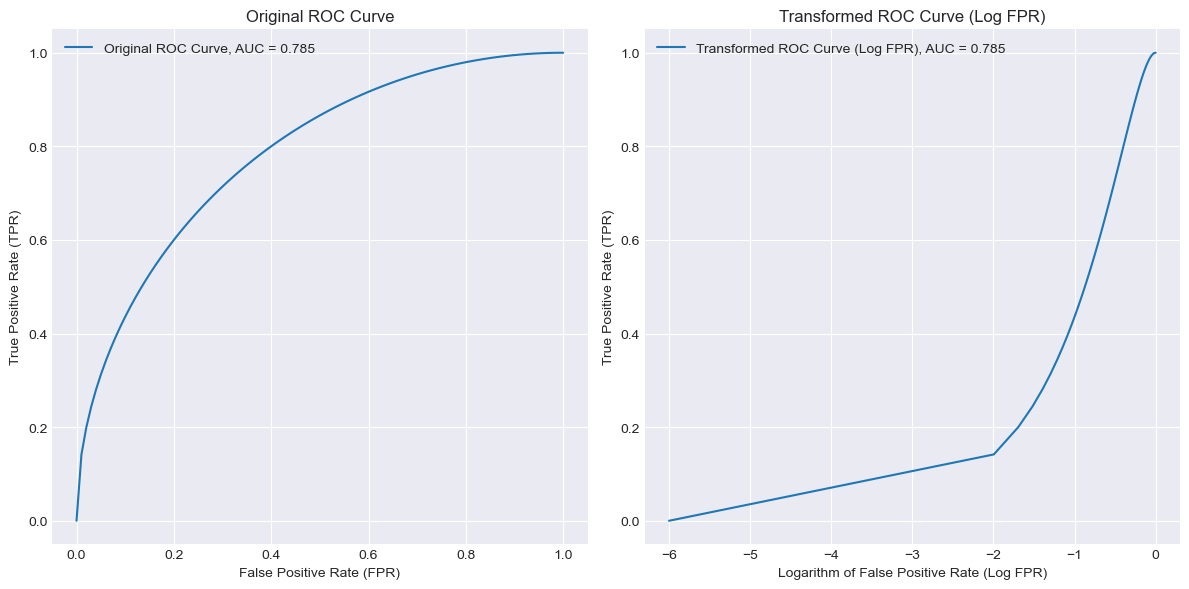

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

matplotlib.rcdefaults()
plt.style.use("seaborn-darkgrid")

# Generate a hypothetical ROC curve
fpr = np.linspace(0, 1, 100)
tpr = np.sqrt(
    1 - (1 - fpr) ** 2
)  # This is just a hypothetical function for demonstration

# Apply logarithmic transformation to FPR
log_fpr = np.log10(fpr + 1e-6)  # Adding a small value to avoid log(0)

# Plotting the original and transformed ROC curves
plt.figure(figsize=(12, 6))


# AUC for the regular ROC curve
regular_auc = simps(tpr, fpr)

# Adjusting the FPR values for numerical integration in the transformed ROC curve
# Since we have log_fpr, we need to convert it back to fpr for accurate integration
# Using the inverse of the log transformation
adjusted_fpr_for_integration = 10**log_fpr - 1e-6  # Inverse of the logarithm

# AUC for the transformed ROC curve
transformed_auc = simps(tpr, adjusted_fpr_for_integration)

regular_auc, transformed_auc

# Plotting the ROC curves
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"Original ROC Curve, AUC = {regular_auc:.3f}")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Original ROC Curve")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_fpr, tpr, label=f"Transformed ROC Curve (Log FPR), AUC = {transformed_auc:.3f}")
plt.xlabel("Logarithm of False Positive Rate (Log FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Transformed ROC Curve (Log FPR)")
plt.legend()

plt.tight_layout()
plt.show()

In [31]:

# Define the points through which the first ROC curve should pass
points1 = [(0, 0), (0.1, 0.5), (0.5, 0.6), (0.6, 0.8), (1, 1)]
x_points1, y_points1 = zip(*points1)
y_values1 = np.interp(x_values, x_points1, y_points1)

# Define the points through which the second ROC curve should pass
points2 = [(0, 0), (0.1, 0.05), (0.4, 0.2), (0.6, 0.9), (1, 1)]
x_points2, y_points2 = zip(*points2)
y_values2 = np.interp(x_values, x_points2, y_points2)

/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_75125/1634362708.py:42: RuntimeWarning: divide by zero encountered in log
  axs[1, 0].plot(np.log(x_values), y_values1, label=f'LogX ROC curve 1: AUC = {auc1_log:.2f}')
/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_75125/1634362708.py:50: RuntimeWarning: divide by zero encountered in log
  axs[1, 1].plot(np.log(x_values), y_values1, label='LogX ROC curve 1')
/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_75125/1634362708.py:51: RuntimeWarning: divide by zero encountered in log
  axs[1, 1].plot(np.log(x_values), y_values2, label='LogX ROC curve 2')
/var/folders/2c/b9b_8fbs13j5zcz4wv9bqqjm0000gn/T/ipykernel_75125/1634362708.py:59: RuntimeWarning: divide by zero encountered in log
  axs[1, 2].plot(np.log(x_values), y_values2, label=f'ROC curve 2: AUC = {auc2_log:.2f}')


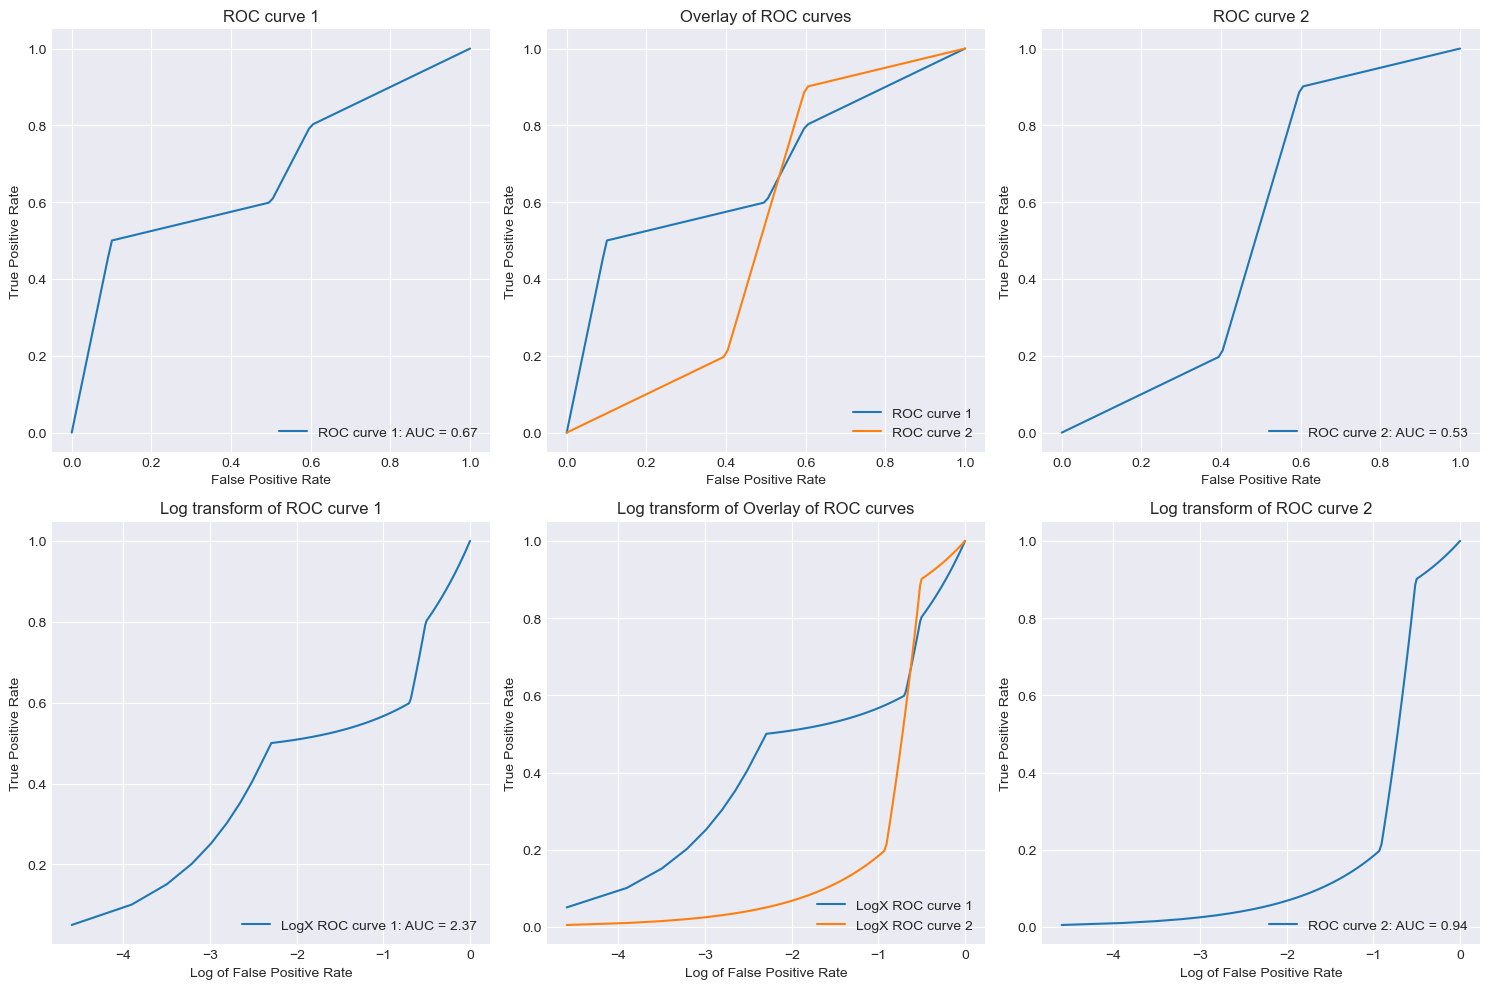

In [32]:
from sklearn.metrics import auc

# Calculate the AUC for the regular ROC curves
auc1 = auc(x_values, y_values1)
auc2 = auc(x_values, y_values2)

# Define a small constant
epsilon = 1e-10

# Calculate the AUC for the log transformed ROC curves
auc1_log = auc(np.log(x_values + epsilon), y_values1)
auc2_log = auc(np.log(x_values + epsilon), y_values2)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the first ROC curve on the first subplot
axs[0, 0].plot(x_values, y_values1, label=f'ROC curve 1: AUC = {auc1:.2f}')
axs[0, 0].set_title('ROC curve 1')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].legend(loc='lower right')
axs[0, 0].grid(True)

# Plot both ROC curves on the second subplot
axs[0, 1].plot(x_values, y_values1, label='ROC curve 1')
axs[0, 1].plot(x_values, y_values2, label='ROC curve 2')
axs[0, 1].set_title('Overlay of ROC curves')
axs[0, 1].set_xlabel('False Positive Rate')
axs[0, 1].set_ylabel('True Positive Rate')
axs[0, 1].legend(loc='lower right')
axs[0, 1].grid(True)

# Plot the second ROC curve on the third subplot
axs[0, 2].plot(x_values, y_values2, label=f'ROC curve 2: AUC = {auc2:.2f}')
axs[0, 2].set_title('ROC curve 2')
axs[0, 2].set_xlabel('False Positive Rate')
axs[0, 2].set_ylabel('True Positive Rate')
axs[0, 2].legend(loc='lower right')
axs[0, 2].grid(True)

# Plot the log transforms of the first ROC curve on the fourth subplot
axs[1, 0].plot(np.log(x_values), y_values1, label=f'LogX ROC curve 1: AUC = {auc1_log:.2f}')
axs[1, 0].set_title('Log transform of ROC curve 1')
axs[1, 0].set_xlabel('Log of False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].legend(loc='lower right')
axs[1, 0].grid(True)

# Plot the log transforms of both ROC curves on the fifth subplot
axs[1, 1].plot(np.log(x_values), y_values1, label='LogX ROC curve 1')
axs[1, 1].plot(np.log(x_values), y_values2, label='LogX ROC curve 2')
axs[1, 1].set_title('Log transform of Overlay of ROC curves')
axs[1, 1].set_xlabel('Log of False Positive Rate')
axs[1, 1].set_ylabel('True Positive Rate')
axs[1, 1].legend(loc='lower right')
axs[1, 1].grid(True)

# Plot the log transforms of the second ROC curve on the sixth subplot
axs[1, 2].plot(np.log(x_values), y_values2, label=f'ROC curve 2: AUC = {auc2_log:.2f}')
axs[1, 2].set_title('Log transform of ROC curve 2')
axs[1, 2].set_xlabel('Log of False Positive Rate')
axs[1, 2].set_ylabel('True Positive Rate')
axs[1, 2].legend(loc='lower right')
axs[1, 2].grid(True)

# Display the plot
plt.tight_layout()
plt.show()

AUC for the original ROC curve: 0.5
AUC for the log-transformed ROC curve: 0.9982936817079362
Range of Log FPR: -6.907755278982137 to 0.0009995003330834232
LogAUC for the log-transformed ROC curve: 0.14451781242821266


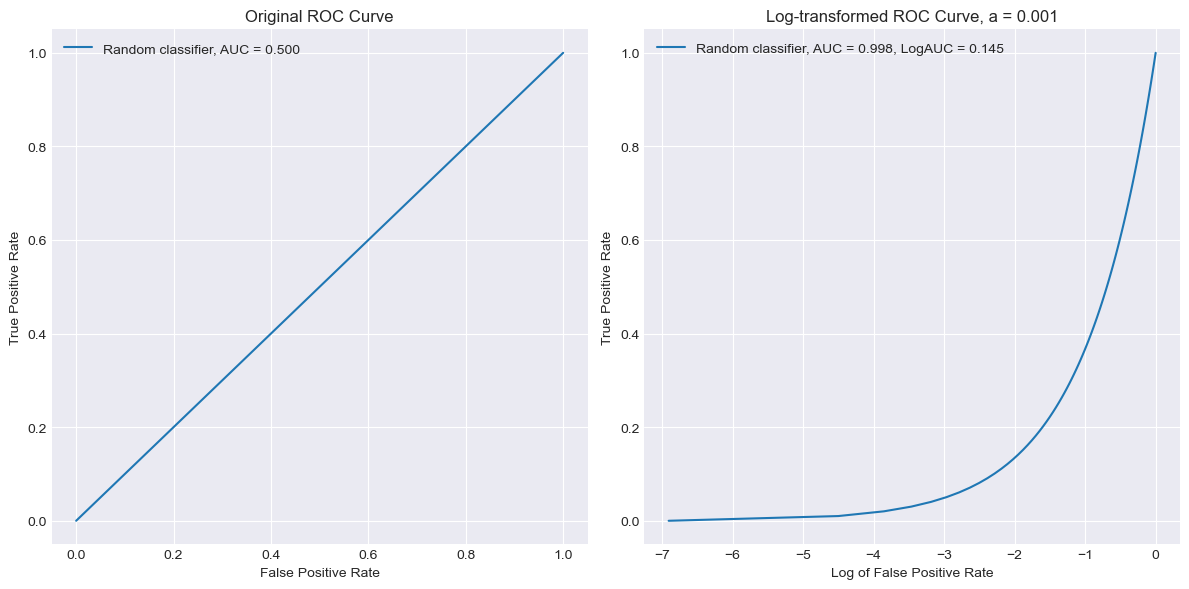

In [51]:
# Define the points
x_values_random_class = np.linspace(0, 1, 100)
y_values_random_class = x_values_random_class  # For a random classifier, the true positive rate equals the false positive rate

# Define a small constant
a = 1e-3

# Apply a logarithmic transformation to the x values
x_values_log = np.log(x_values_random_class + a)

# Calculate the AUC for the original ROC curve
auc_original = auc(x_values_random_class, y_values_random_class)
print(f'AUC for the original ROC curve: {auc_original}')

# Calculate the AUC for the log-transformed ROC curve
auc_transformed = auc(x_values_log, y_values_random_class)
print(f'AUC for the log-transformed ROC curve: {auc_transformed}')
print(f"Range of Log FPR: {np.min(x_values_log)} to {np.max(x_values_log)}")

# Calculate the LogAUC for the log-transformed ROC curve
log_auc_transformed = auc_transformed/-np.log(a)
print(f'LogAUC for the log-transformed ROC curve: {log_auc_transformed}')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original ROC curve on the first subplot
axs[0].plot(x_values_random_class, y_values_random_class, label=f'Random classifier, AUC = {auc_original:.3f}')
axs[0].set_title('Original ROC Curve')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend(loc='best')
axs[0].grid(True)

# Plot the transformed ROC curve on the second subplot
axs[1].plot(x_values_log, y_values_random_class, label=f'Random classifier, AUC = {auc_transformed:.3f}, LogAUC = {log_auc_transformed:.3f}')
axs[1].set_title(f'Log-transformed ROC Curve, a = {a}')
axs[1].set_xlabel('Log of False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].legend(loc='best')
axs[1].grid(True)

# Display the plot
plt.tight_layout()
plt.show()

In [52]:
from sklearn.metrics import auc

# Calculate the AUC for the regular ROC curves
auc1 = auc(x_values, y_values1)
auc2 = auc(x_values, y_values2)

# Define a small constant
epsilon = 1e-10

# Calculate the AUC for the log transformed ROC curves
auc1_log = auc(np.log(x_values + epsilon), y_values1)
auc2_log = auc(np.log(x_values + epsilon), y_values2)

fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the first ROC curve on the first subplot
axs[0, 0].plot(x_values, y_values1, label=f"ROC curve 1: AUC = {auc1:.2f}")
axs[0, 0].set_title("ROC curve 1")
axs[0, 0].set_xlabel("False Positive Rate")
axs[0, 0].set_ylabel("True Positive Rate")
axs[0, 0].legend(loc="lower right")
axs[0, 0].grid(True)

# Plot both ROC curves on the second subplot
axs[0, 1].plot(x_values, y_values1, label="ROC curve 1")
axs[0, 1].plot(x_values, y_values2, label="ROC curve 2")
axs[0, 1].set_title("Overlay of ROC curves")
axs[0, 1].set_xlabel("False Positive Rate")
axs[0, 1].set_ylabel("True Positive Rate")
axs[0, 1].legend(loc="lower right")
axs[0, 1].grid(True)

# Plot the second ROC curve on the third subplot
axs[0, 2].plot(x_values, y_values2, label=f"ROC curve 2: AUC = {auc2:.2f}")
axs[0, 2].set_title("ROC curve 2")
axs[0, 2].set_xlabel("False Positive Rate")
axs[0, 2].set_ylabel("True Positive Rate")
axs[0, 2].legend(loc="lower right")
axs[0, 2].grid(True)

# Plot the log transforms of the first ROC curve on the fourth subplot
axs[1, 0].plot(
    np.log(x_values), y_values1, label=f"LogX ROC curve 1: AUC = {auc1_log:.2f}"
)
axs[1, 0].set_title("Log transform of ROC curve 1")
axs[1, 0].set_xlabel("Log of False Positive Rate")
axs[1, 0].set_ylabel("True Positive Rate")
axs[1, 0].legend(loc="lower right")
axs[1, 0].grid(True)

# Plot the log transforms of both ROC curves on the fifth subplot
axs[1, 1].plot(np.log(x_values), y_values1, label="LogX ROC curve 1")
axs[1, 1].plot(np.log(x_values), y_values2, label="LogX ROC curve 2")
axs[1, 1].set_title("Log transform of Overlay of ROC curves")
axs[1, 1].set_xlabel("Log of False Positive Rate")
axs[1, 1].set_ylabel("True Positive Rate")
axs[1, 1].legend(loc="lower right")
axs[1, 1].grid(True)

# Plot the log transforms of the second ROC curve on the sixth subplot
axs[1, 2].plot(np.log(x_values), y_values2, label=f"ROC curve 2: AUC = {auc2_log:.2f}")
axs[1, 2].set_title("Log transform of ROC curve 2")
axs[1, 2].set_xlabel("Log of False Positive Rate")
axs[1, 2].set_ylabel("True Positive Rate")
axs[1, 2].legend(loc="lower right")
axs[1, 2].grid(True)

# Display the plot
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10, 100]